<h1>Lab 1</h1>
<p>Students: 336249628,336249743</p>

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97253\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
spec_char_list=['~', ':',  '+', '^', '%','*', '|', '&','<', '`', '=', '!', '>','?', '$']
#-------------------------------------------------------------------------------------------------------------------------------
file=pd.read_csv('trainTwitter.csv')
tweetCol=file['tweet']
tweetTable=list()
stop_words = set(stopwords.words('english'))
text=''
wordsNumber=0
labelCol=file['label']
heshtag=list()
#-------------------------------------------------------------------------------------------------------------------------------
def lettersNumber(str):
    num=0
    for t in str:
            num=num+len(t)
    return num
#-------------------------------------------------------------------------------------------------------------------------------
def stopWordsCount(str):
    num=0
    for s in str:
        if s in stop_words:
            num=num+1
    return num
#-------------------------------------------------------------------------------------------------------------------------------
def numCharCount(str):
    total_num_char=0
    for s in str:
        for i in s:
            if i.isnumeric():
                total_num_char=total_num_char+1
    return total_num_char
#-------------------------------------------------------------------------------------------------------------------------------
def specCharCount(str):
    total_spec_char=0
    for s in str:
        for i in s:
            if i in spec_char_list:
                total_spec_char=total_spec_char+1
    return total_spec_char
#-------------------------------------------------------------------------------------------------------------------------------
def capWordsCount(str):
    total_cap_words=0
    for s in str:
        if s.isupper():
            total_cap_words=total_cap_words+1
    return total_cap_words
#-------------------------------------------------------------------------------------------------------------------------------
def makingRow(curTweet,index):
    global text
    global wordsNumber
    def check_hash(w):
        for s in w:
            if s[0]=='#':
                heshtag.append(w)
            return s[0]!='@' and s[0]!='#'
    # Init result list 
    result=list()
    # Init words 
    words = curTweet.split()
    clean_words = list(filter(check_hash, words)) # clean hash from words list
    clean_str=" ".join(clean_words)
    result.append(clean_str)
    result.append(labelCol[index])
    text=text+clean_str
    #WordsNumber append
    wordsNumber=wordsNumber+len(clean_words)
    result.append(wordsNumber)
    #LettersNumber append
    result.append(lettersNumber(clean_words))
    #Avg_Word_Size append
    if len(clean_words) == 0:
        result.append(0)
    else:
        result.append(round(lettersNumber(clean_words)/len(clean_words),2))
    #Number of stopwords append                    
    result.append(stopWordsCount(clean_words))
    #Number of numeric characters append
    result.append(numCharCount(clean_words))
    #Number of special characters append
    result.append(specCharCount(clean_words))
    #Number of capital words append
    result.append(capWordsCount(clean_words))
    wordsNumber=0
    return result
#-------------------------------------------------------------------------------------------------------------------------------
def mainFunc():
    i=0
    while(i<len(tweetCol)):
        current=makingRow(tweetCol[i],i)
        tweetTable.append(current)
        i=i+1
#-------------------------------------------------------------------------------------------------------------------------------
mainFunc()

#create table with inf for each tweet
df = pd.DataFrame(tweetTable, columns =['Tweet','Label','WordsNumber', 'LettersNumber','Avg_Word_Size','Number of stopwords',
                                    'Number of numeric characters','Number of special characters','Number of capital words'])
df.head(10)

,Tweet,Label,WordsNumber,LettersNumber,Avg_Word_Size,Number of stopwords,Number of numeric characters,Number of special characters,Number of capital words
0,when a father is dysfunctional and is so selfi...,0,16,73,4.56,10,0,0,0
1,thanks for credit i can't use cause they don't...,0,14,63,4.50,5,0,0,0
2,bihday your majesty,0,3,17,5.67,1,0,0,0
3,i love u take with u all the time in urð±!!!...,0,13,63,4.85,5,0,3,0
4,factsguide: society now,0,3,21,7.00,1,0,1,0
5,[2/2] huge fan fare and big talking before the...,0,18,81,4.50,6,2,0,0
6,camping tomorrow dannyâ¦,0,3,23,7.67,0,0,0,0
7,the next school year is the year for exams.ð...,0,14,62,4.43,6,0,0,0
8,we won!!! love the land!!! â¦,0,6,25,4.17,2,0,6,0
9,welcome here ! i'm it's so !,0,7,22,3.14,3,0,2,0


<b>Wordcloud for the full collection of words</b>

In [4]:
!pip3 install wordcloud


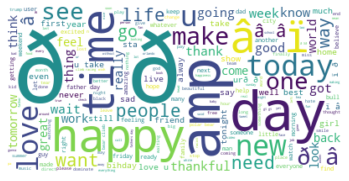

In [5]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

stopW=set(STOPWORDS)
stopW.update(stop_words)
wordcloud=WordCloud(stopwords=stopW,background_color='white').generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<b>Wordcloud for tweets with 0 label</b>

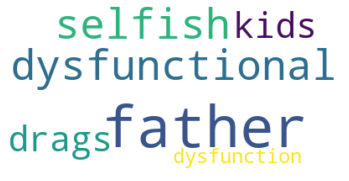

In [6]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

stopW=set(STOPWORDS)
stopW.update(stop_words)
zeros=list()
ones=list()
all_t=list(df['Tweet'])
all_l=list(df['Label'])

for l in all_l:
    if l==0:
        zeros.append(all_t[all_l.index(l)])
    else:
       ones.append(all_t[all_l.index(l)])
    

#classification_dict={0:zeros,1:ones}
zeros_text=''.join(zeros)
wordcloud=WordCloud(stopwords=stopW,background_color='white').generate(zeros_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

<b>Wordcloud for tweet with label 1</b>

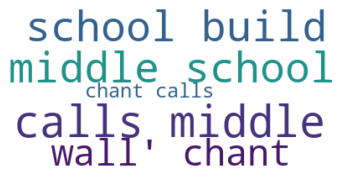

In [7]:
ones_text=''.join(ones)
wordcloud=WordCloud(stopwords=stopW,background_color='white').generate(ones_text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

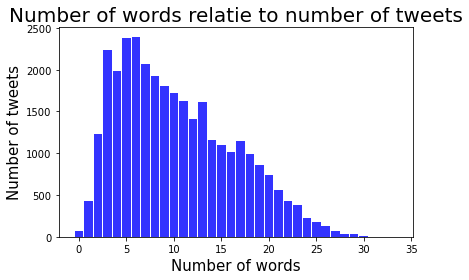

In [8]:
#Graph Number of words relatie to number of tweets
wordsN=df["WordsNumber"]
my_dict={}
for t in wordsN:
    if t in my_dict.keys():
        my_dict[t]=my_dict.get(t) +1
    else:
        my_dict[t]=1

x=[*my_dict]
y=list(my_dict.values())
width = 0.9
opacity = 0.8

fig, ax = plt.subplots()
rects1 = plt.bar(x, y,width,alpha=opacity,color='b')
ax.set_title("Number of words relatie to number of tweets",fontsize=20)
ax.set_ylabel("Number of tweets",fontsize=15)
ax.set_xlabel("Number of words",fontsize=15)
plt.tight_layout()
plt.show()

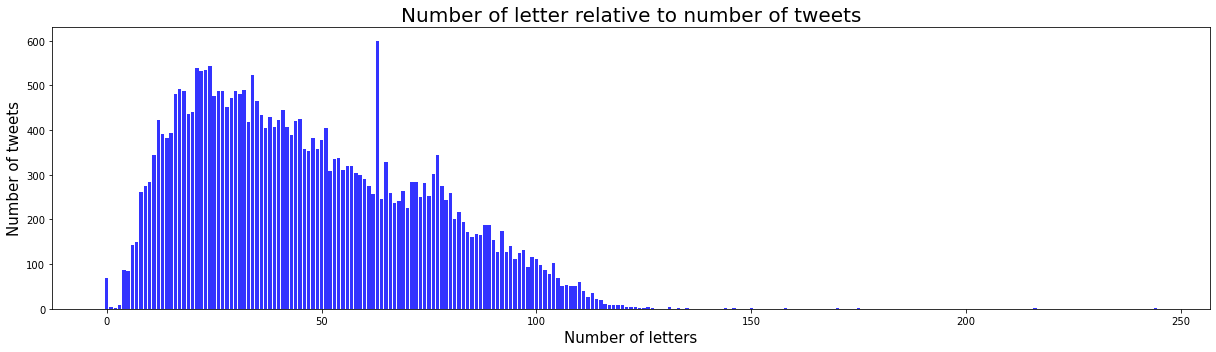

In [9]:
#Graph number of letters relatie to number of tweets
import matplotlib.pyplot as plt
wordsN=df["LettersNumber"]
my_dict={}
for t in wordsN:
    if t in my_dict.keys():
        my_dict[t]=my_dict.get(t) +1
    else:
        my_dict[t]=1

x=[*my_dict]
y=list(my_dict.values())
width = 0.8
opacity = 0.8
fig, ax = plt.subplots()
fig.set_size_inches(17, 5)
rects1 = plt.bar(x, y,width,alpha=opacity,color='b')
ax.set_title("Number of letter relative to number of tweets",fontsize=20)
ax.set_ylabel("Number of tweets",fontsize=15)
ax.set_xlabel("Number of letters",fontsize=15)
plt.tight_layout()
plt.show()

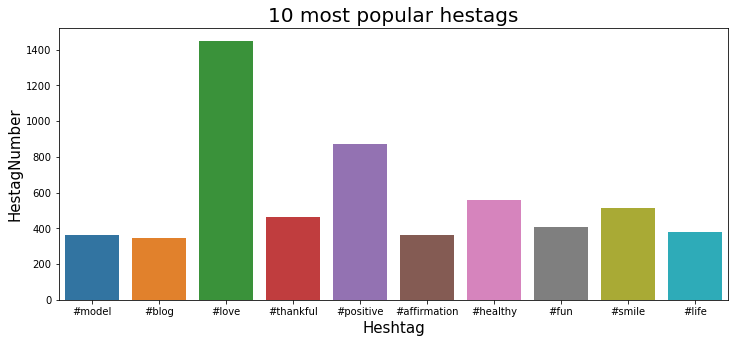

In [10]:
#10 most frequent heshtags
#y---->number of tweets
#x---->which tweets
import seaborn as sns
import matplotlib.pyplot as plt

my_heshtag={}
mostFreqhestag=list()
temp=list()
for t in heshtag:
    if t in my_heshtag.keys():
        my_heshtag[t]=my_heshtag.get(t) +1
    else:
        my_heshtag[t]=1
heshtagNumber=list(set(my_heshtag.values()))
heshtagNumber.sort()
mostFreqhestagNumber=heshtagNumber[len(heshtagNumber)-10:len(heshtagNumber)]


for t in my_heshtag.keys():
    if my_heshtag.get(t) in mostFreqhestagNumber:
        temp.append(t)
        temp.append(my_heshtag.get(t))
        mostFreqhestag.append(temp)
        temp=[]
       
mostFreqhestag_df = pd.DataFrame(mostFreqhestag, columns =['Heshtag','HestagNumber'])
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
ax = sns.barplot(x=mostFreqhestag_df['Heshtag'], y=mostFreqhestag_df['HestagNumber'])
ax.set_xlabel('Heshtag',fontsize=15)
ax.set_ylabel('HestagNumber',fontsize=15)
ax.set_title("10 most popular hestags",fontsize=20)
#------------------------------------------------------------------------------------------
plt.show()

<p>This first visualization seems interisting becouse helps us understand which opics, items, events, and more encourage people to share their thoughts online.</p>

In [50]:
!pip3 install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [11]:
#Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
from textblob import TextBlob
tweet_polarity=list()

for t in df['Tweet']:
    tweet_polarity.append(TextBlob(t).sentiment.polarity)

df['Tweet_Polarity']=tweet_polarity
df.head()


,Tweet,Label,WordsNumber,LettersNumber,Avg_Word_Size,Number of stopwords,Number of numeric characters,Number of special characters,Number of capital words,Tweet_Polarity
0,when a father is dysfunctional and is so selfi...,0,16,73,4.56,10,0,0,0,-0.500000
1,thanks for credit i can't use cause they don't...,0,14,63,4.50,5,0,0,0,0.200000
2,bihday your majesty,0,3,17,5.67,1,0,0,0,0.000000
3,i love u take with u all the time in urð±!!!...,0,13,63,4.85,5,0,3,0,0.976562
4,factsguide: society now,0,3,21,7.00,1,0,1,0,0.000000


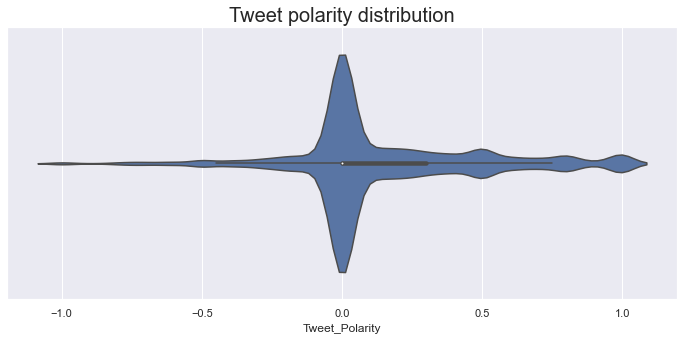

In [12]:
#Tweet_polarity graph
import seaborn as sns
pol=df['Tweet_Polarity']


sns.set(rc = {'figure.figsize':(12,5)})
sns.violinplot(x='Tweet_Polarity', data=df);
plt.title("Tweet polarity distribution",fontsize=20)
plt.show()

<p>Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.n</p>
<p>The second visualization can help us understand the emotional nature of the tweets taken for analysis.</p>

In [13]:
#Subjective sentences generally refer to personal opinion, emotion or 
#judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

tweet_subjectivity=list()

for t in df['Tweet']:
    tweet_subjectivity.append(TextBlob(t).sentiment.subjectivity)

df['Tweet_Subjectivity']=tweet_subjectivity
df.head()

,Tweet,Label,WordsNumber,LettersNumber,Avg_Word_Size,Number of stopwords,Number of numeric characters,Number of special characters,Number of capital words,Tweet_Polarity,Tweet_Subjectivity
0,when a father is dysfunctional and is so selfi...,0,16,73,4.56,10,0,0,0,-0.500000,1.0
1,thanks for credit i can't use cause they don't...,0,14,63,4.50,5,0,0,0,0.200000,0.2
2,bihday your majesty,0,3,17,5.67,1,0,0,0,0.000000,0.0
3,i love u take with u all the time in urð±!!!...,0,13,63,4.85,5,0,3,0,0.976562,0.6
4,factsguide: society now,0,3,21,7.00,1,0,1,0,0.000000,0.0


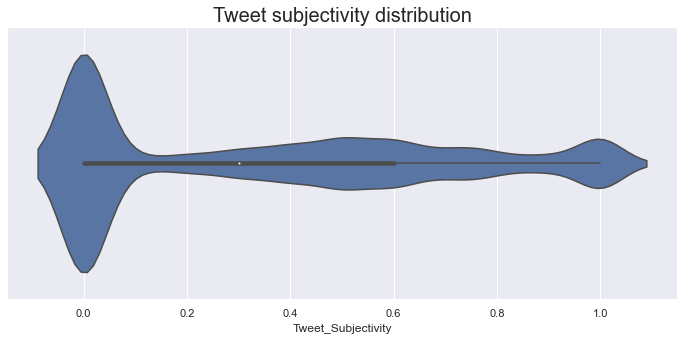

In [108]:
#Tweet_subjectivity distribution graph
import seaborn as sns
pol=df['Tweet_Subjectivity']

sns.set(rc = {'figure.figsize':(12,5)})
sns.violinplot(x='Tweet_Subjectivity', data=df);
plt.title("Tweet subjectivity distribution",fontsize=20)
plt.show()

<p>Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information.The closer the value is to one, it tells us that this particular tweet is mostly a public opinion and not a factual information.</p>
<p>The third visualization can help us understand how influential public opinion/factual informatio can be on the desire to share thoughts online.</p>

<b>TreeMap</b>

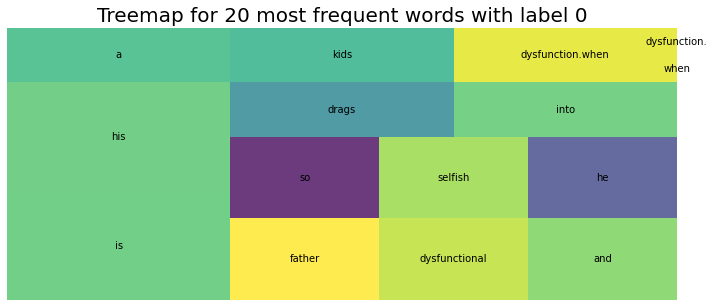

In [24]:
import matplotlib.pyplot as plt
import squarify
from collections import Counter
#--------------------------------Preparation--------------------------------------------------
z1=list()
z2=list()
o1=list()
o2=list()

zeros_t=''.join(zeros)
zeros_counter=Counter(zeros_t.split())
zeroes_words=zeros_counter.most_common(20)

ones_t=''.join(ones)
ones_counter=Counter(ones_t.split())
ones_words=ones_counter.most_common(20)

    
def helpFunc(dist1,dist2,fromL):
    for d in fromL:
        dist1.append(d[0])
        dist2.append(d[1])
    
helpFunc(z1,z2,zeroes_words)
helpFunc(o1,o2,ones_words)
#------------------------------------------------------------------------------------------------
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 5)
squarify.plot(sizes=z2, label=z1, alpha=0.8 )
plt.title("Treemap for 20 most frequent words with label 0",fontsize=20)
plt.axis('off')
plt.show()

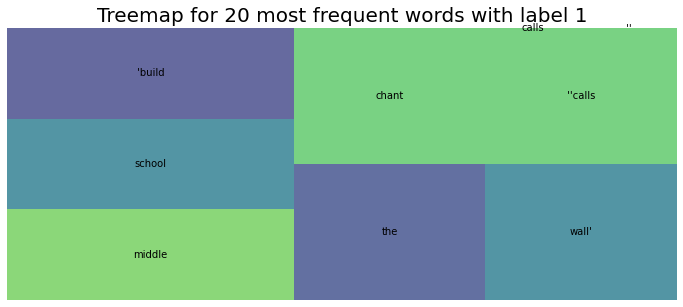

In [25]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(12, 5)
squarify.plot(sizes=o2, label=o1, alpha=0.8 )
plt.title("Treemap for 20 most frequent words with label 1",fontsize=20)
plt.axis('off')
plt.show()

<h3>Preliminary processing to create a dictionary</h3>


In [32]:
!pip install pyspellchecker

In [15]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import pandas as pd
from spellchecker import SpellChecker

stop_words = set(stopwords.words('english'))
i=0
spell = SpellChecker()

def thingsTodo(row):
    #All words to lowercase
    all_text= row.lower()
    #Removing special punctuation marks
    res = re.sub(r'[^\w\s]', '', all_text)
    #Removing stop words
    text_tokens = word_tokenize(res)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    return filtered_sentence

#afterL all sentences in final mode
afterL=list()
tweetsCol=df['Tweet']

Sentences_dictTable = pd.DataFrame(list(tweetsCol), columns=['Before'])

while(i<len(tweetsCol)):
    temp=thingsTodo(str(tweetsCol[i]))
    afterL.append(temp)
    i=i+1
    
def corrector(sent):
    tokens=tokens = word_tokenize(sent)
    misspelled = spell.unknown(tokens)
    for word in sent:
        if word in misspelled:
            sent.replace(word,spell.correction(word))
    return sent

afterL =list(map(corrector,afterL))
Sentences_dictTable['After']=afterL
Sentences_dictTable.to_csv('clean-tweets.csv')
Sentences_dictTable.head(20)

,Before,After
0,when a father is dysfunctional and is so selfi...,father dysfunctional selfish drags kids dysfun...
1,thanks for credit i can't use cause they don't...,thanks credit cant use cause dont offer wheelc...
2,bihday your majesty,bihday majesty
3,i love u take with u all the time in urð±!!!...,love u take u time urð ðððð ððð
4,factsguide: society now,factsguide society
5,[2/2] huge fan fare and big talking before the...,22 huge fan fare big talking leave chaos pay d...
6,camping tomorrow dannyâ¦,camping tomorrow dannyâ
7,the next school year is the year for exams.ð...,next school year year examsð cant think ð
8,we won!!! love the land!!! â¦,love land â
9,welcome here ! i'm it's so !,welcome im
